In [2]:
import scipy.stats as sct
import seaborn as sns
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline
from math import sqrt
from pycaret.classification import *
import pandas as pd
import numpy as np
import seaborn as sns
from math import sqrt

In [3]:
mt = pd.read_csv('metadata.csv', sep=',')

train = pd.read_csv('train1.csv', sep=',')
train

,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,var13,var14,var15,var16,var17,var18,var19,var20,var21,var22,var23,var24,var25,var26,var27,var28,var29,var30,var31,var32,var33,var34,var35,var36,var37,var38,var39,var40,var41,var42,var43,var44,var45,var46,var47,var48,var49,var50,var51,var52,var53,var54,var55,var56,var57,var58,var59,var60,var61,var62,var63,var64,var65,var66,var67,var68,y
0,18,19,2853,29442,1386,2435,35,0,3,63,6498,1166,2007,26,13,11,11,4,1547,26,2068,1,3,0,4,7,0,24,4,2,0,16,3,44,463,27,2,0,4,9,3,25,6,1,4,3,1,0,0,0,0,42,1,1,0.212414,0.137,0.833333,0.037822,0.058070,0.311441,0.142303,0.056146,0.632694,0.024054,0.253356,0.00603,0.132353,0.139706,1
1,4,110,1986,13684,7189,0,0,17,3,63,13989,497,2289,16,1,3,3,3,1797,16,2417,5,1,2,1,6,1,4,2,1,0,14,0,1,532,2,1,0,4,7,3,30,3,0,0,0,0,0,0,0,0,20,1,1,0.228784,0.308,0.305376,0.069325,0.248909,-999.000000,-999.000000,0.070991,0.773966,0.019315,-999.000000,-999.00000,0.147059,0.106618,0
2,0,39,1019,10232,678,791,16,0,3,63,9739,562,641,10,34,34,10,4,511,10,664,5,3,2,1,7,0,3,4,1,0,11,1,3,81,26,3,0,4,3,3,23,5,1,0,0,0,0,0,0,0,12,1,1,0.204636,0.213,0.451613,0.018639,0.214520,-999.000000,0.200814,0.051046,0.980827,0.018536,-999.000000,-999.00000,0.382353,0.242647,0
3,20,39,1751,2689,8235,1042,13,10,1,14,2890,6541,811,8,59,60,23,5,624,8,839,0,0,0,0,1,1,19,1,2,0,8,0,11,414,27,0,0,4,10,3,22,10,1,1,1,0,1,1,0,0,36,1,1,0.208299,0.716,0.101075,0.204753,0.349421,-999.000000,0.352379,0.044301,0.951564,0.023684,0.363370,0.00201,0.147059,0.132353,0
4,7,44,2262,29428,6031,304,16,0,3,63,13541,7238,260,10,55,56,20,5,1413,10,270,2,3,2,1,8,1,3,4,1,0,17,4,3,567,8,3,2,4,5,3,26,5,1,0,0,0,0,1,0,0,19,1,1,0.222896,0.596,0.101075,0.140394,0.189641,0.021226,0.226161,0.059125,0.906155,0.020733,-999.000000,-999.00000,0.455882,0.132353,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14118,4,39,2511,28766,1109,2094,31,24,3,0,5082,0,1678,23,55,56,20,5,198,23,1739,5,4,2,1,7,0,26,5,1,0,17,5,12,314,0,1,0,4,2,3,23,5,1,0,0,0,0,0,0,0,25,2,2,0.227307,0.048,0.978495,0.063199,0.122448,-999.000000,0.069347,0.036178,0.869828,0.016160,-999.000000,-999.00000,0.455882,0.147059,0
14119,19,129,1114,0,6376,0,0,27,0,0,0,0,1387,13,0,0,0,0,719,13,1445,5,1,1,2,0,0,24,4,1,0,13,6,25,532,27,1,0,4,10,1,26,13,1,0,0,0,0,0,1,0,0,0,0,0.210104,-999.000,-999.000000,-999.000000,-999.000000,-999.000000,0.295418,0.055899,0.921292,0.018293,-999.000000,-999.00000,0.147059,0.198529,0
14120,27,44,1786,23761,9048,623,35,27,3,14,1249,882,358,26,34,34,10,4,482,26,380,5,3,2,1,7,0,24,4,1,0,17,3,44,362,2,0,0,4,1,3,25,4,1,0,0,0,0,0,0,0,16,2,2,0.217944,0.029,1.000000,0.034263,0.207001,-999.000000,0.203394,0.040697,0.930373,0.009440,-999.000000,-999.00000,0.397059,0.158088,0
14121,4,89,210,19593,3634,2453,35,27,1,63,21128,3849,2033,26,55,56,20,5,1573,26,2093,3,3,0,0,7,0,24,4,2,0,16,2,24,553,0,18,0,4,1,3,28,14,1,0,0,0,0,1,0,1,21,2,2,0.209336,0.154,0.833333,0.022503,0.200405,0.070788,0.381038,0.100384,0.680121,0.041096,-999.000000,-999.00000,0.264706,0.128676,0


In [15]:
test = pd.read_csv('test1.csv', sep=',')
test

,id,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,var13,var14,var15,var16,var17,var18,var19,var20,var21,var22,var23,var24,var25,var26,var27,var28,var29,var30,var31,var32,var33,var34,var35,var36,var37,var38,var39,var40,var41,var42,var43,var44,var45,var46,var47,var48,var49,var50,var51,var52,var53,var54,var55,var56,var57,var58,var59,var60,var61,var62,var63,var64,var65,var66,var67,var68
0,0,5,126,1353,28956,743,1289,27,0,1,33,4530,914,991,19,1,3,3,3,1155,19,1031,5,3,2,3,7,0,25,4,1,0,11,2,62,413,27,0,0,4,6,3,24,3,1,0,0,0,0,0,0,0,44,1,1,0.217528,0.272,0.367742,0.062900,0.201839,0.353965,0.166641,0.049108,0.986882,0.016683,-999.0,-999.0,0.176471,0.253676
1,2,6,126,1446,7803,5151,935,35,0,3,63,8731,1341,2033,26,58,58,22,5,1299,26,773,5,3,1,2,1,0,25,4,0,1,6,5,58,692,21,15,8,4,0,1,30,0,1,0,0,0,0,0,0,0,13,1,1,0.221968,0.853,0.053763,0.177047,0.072127,0.074555,0.217009,0.144403,0.892028,0.038323,-999.0,-999.0,0.147059,0.099265
2,4,5,44,243,4325,1109,1903,33,24,1,63,10131,914,1503,24,60,61,23,5,1294,24,1562,5,4,1,0,1,0,26,5,2,0,17,0,12,553,0,18,0,4,10,3,26,14,1,0,0,0,0,0,0,0,36,1,1,0.213224,0.632,0.101075,0.210879,0.324770,0.384992,0.330680,0.072864,0.930373,0.021052,-999.0,-999.0,0.294118,0.136029
3,7,4,53,419,743,7750,183,35,0,3,14,636,5879,146,26,22,22,10,4,811,26,152,5,3,2,4,4,0,24,4,2,0,12,5,38,662,28,1,0,4,9,3,28,7,1,0,0,0,0,0,1,0,13,1,1,0.205044,0.117,0.935484,0.007068,0.131070,-999.000000,0.244936,0.158088,0.986882,0.022649,-999.0,-999.0,0.294118,0.220588
4,15,4,126,1863,22693,5625,965,9,0,3,63,24967,4427,772,5,73,73,29,5,595,5,796,0,1,0,1,7,0,11,2,1,0,21,3,18,546,0,1,0,4,6,3,28,8,1,0,0,0,0,1,0,0,51,1,1,0.203750,0.079,0.967742,0.024989,0.225166,0.059940,0.252794,0.080405,0.944501,0.021806,-999.0,-999.0,0.352941,0.113971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21178,35297,4,126,1460,13335,9048,620,35,27,3,63,13567,2617,572,26,37,35,11,4,1573,26,592,5,3,2,1,1,0,24,4,1,0,21,6,42,332,21,20,9,1,11,3,25,13,1,0,0,0,0,0,0,0,34,2,2,0.213106,0.065,0.967742,0.387701,0.148933,-999.000000,0.326307,0.132833,0.968718,0.039626,-999.0,-999.0,0.323529,0.253676
21179,35298,18,19,532,14837,2590,855,27,20,3,63,15367,2261,678,19,0,0,0,0,1383,19,700,0,3,2,1,0,0,25,4,1,0,20,0,60,578,2,0,0,4,2,3,26,6,1,0,0,0,0,0,0,0,10,2,2,0.210435,0.740,0.101075,-999.000000,0.179243,0.205030,0.229354,0.052108,0.940464,0.016952,-999.0,-999.0,0.088235,0.209559
21180,35300,4,126,2923,16685,3162,1604,35,0,3,63,17658,4369,1279,26,0,0,0,0,971,26,1334,5,3,0,1,0,0,24,4,1,0,12,5,49,74,28,2,0,4,4,3,19,4,1,0,0,0,0,0,0,0,39,2,2,0.218353,0.288,0.367742,-999.000000,0.237607,0.810448,0.179781,0.029155,0.745711,0.020158,-999.0,-999.0,0.205882,0.161765
21181,35302,5,0,0,367,7637,1389,35,0,3,63,28370,679,1117,26,34,34,10,4,868,26,1158,5,3,2,1,9,0,24,4,1,0,15,5,54,434,0,1,0,4,19,3,23,6,1,0,0,0,0,0,0,0,3,2,2,0.224865,0.324,0.246237,0.199008,0.102662,-999.000000,0.149598,0.032583,0.891019,0.012596,-999.0,-999.0,0.000000,0.246324


In [5]:
train1 = train.copy

In [6]:
del train['var2']
del train['var8']
del train['var15']
del train['var26']
del train['var31']
del train['var37']
del train['var38']
del train['var39']
del train['var41']
del train['var44']
del train['var45']
del train['var46']
del train['var47']
del train['var48']
del train['var50']
del train['var51']
del train['var52']
del train['var55']
del train['var56']
del train['var57']
del train['var58']
del train['var59']
del train['var61']
del train['var64']
del train['var65']
del train['var66']
del train['var67']
del train['var68']

In [7]:
model1 = setup(train, target = 'y', session_id=123, normalize=True, fix_imbalance=True, transformation = True)

,Description,Value
0,session_id,123
1,Target,y
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(14123, 41)"
5,Missing Values,False
6,Numeric Features,26
7,Categorical Features,14
8,Ordinal Features,False
9,High Cardinality Features,False


In [8]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8575,0.8331,0.4939,0.7058,0.5800,0.4976,0.5097,9.3680
lightgbm,Light Gradient Boosting Machine,0.8560,0.8391,0.4788,0.7086,0.5697,0.4874,0.5018,2.0410
xgboost,Extreme Gradient Boosting,0.8488,0.8261,0.4762,0.6722,0.5567,0.4689,0.4794,14.9830
rf,Random Forest Classifier,0.8450,0.8132,0.4196,0.6848,0.5192,0.4333,0.4524,3.1900
ada,Ada Boost Classifier,0.8427,0.8171,0.5238,0.6303,0.5708,0.4757,0.4795,2.2950
et,Extra Trees Classifier,0.8200,0.7725,0.2624,0.6199,0.3683,0.2829,0.3188,3.1040
dt,Decision Tree Classifier,0.7539,0.6473,0.4697,0.4012,0.4323,0.2765,0.2782,0.8620
lr,Logistic Regression,0.6962,0.7733,0.7007,0.3652,0.4800,0.2944,0.3257,2.9830
lda,Linear Discriminant Analysis,0.6930,0.7713,0.7022,0.3624,0.4779,0.2907,0.3227,1.2680
ridge,Ridge Classifier,0.6929,0.0000,0.7022,0.3623,0.4778,0.2906,0.3226,0.6210


In [9]:
model = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8615,0.8349,0.5455,0.6968,0.6119,0.5291,0.5350
1,0.8625,0.8381,0.5354,0.7067,0.6092,0.5277,0.5352
2,0.8625,0.8374,0.4899,0.7348,0.5879,0.5093,0.5244
3,0.8473,0.8453,0.5051,0.6536,0.5698,0.4788,0.4847
4,0.8524,0.8308,0.4495,0.7063,0.5494,0.4663,0.4833
5,0.8564,0.8116,0.5000,0.6972,0.5824,0.4985,0.5085
6,0.8532,0.8199,0.4596,0.7054,0.5566,0.4733,0.4889
7,0.8563,0.8417,0.4646,0.7188,0.5644,0.4831,0.4996
8,0.8755,0.8562,0.5736,0.7434,0.6476,0.5735,0.5806
9,0.8472,0.8148,0.4162,0.6949,0.5206,0.4364,0.4568


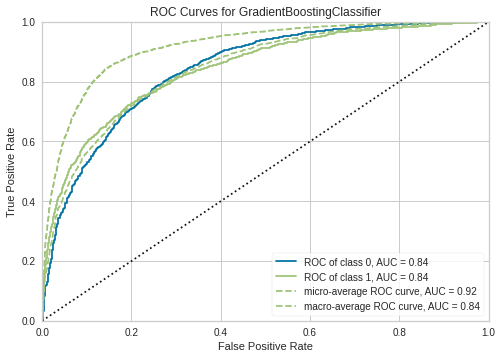

In [10]:
plot_model(model)

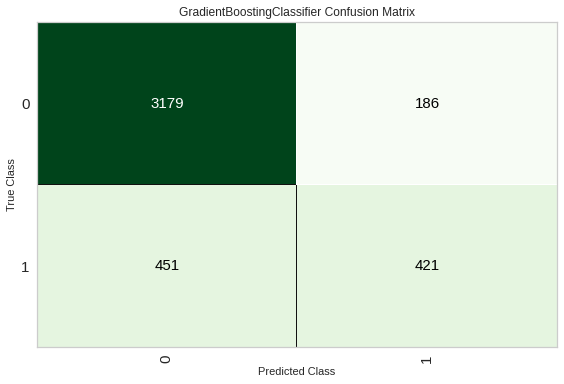

In [11]:
plot_model(model, plot='confusion_matrix')

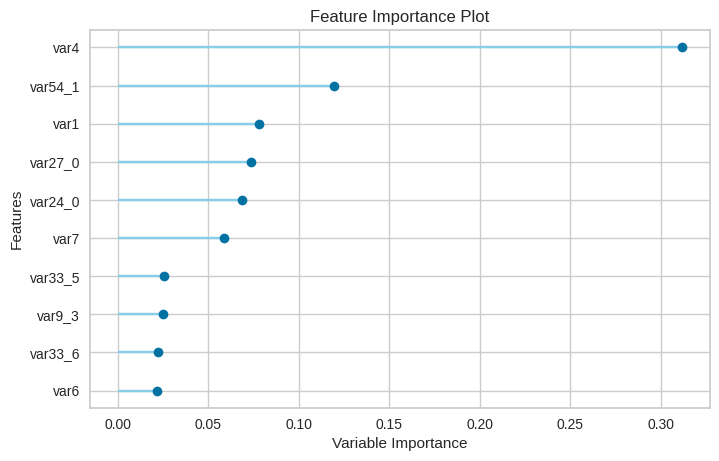

In [12]:
plot_model(model, plot='feature')

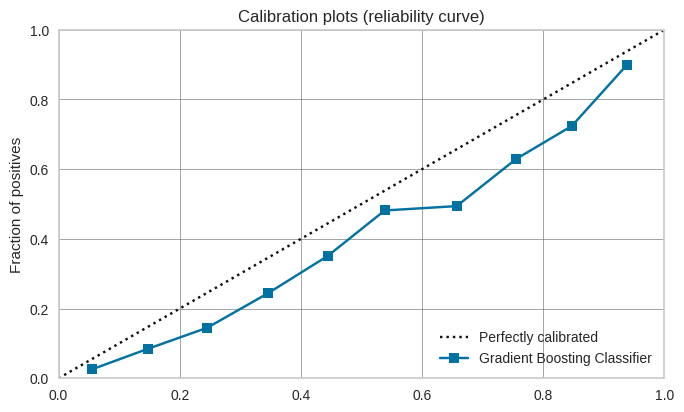

In [13]:
plot_model(model, plot='calibration')

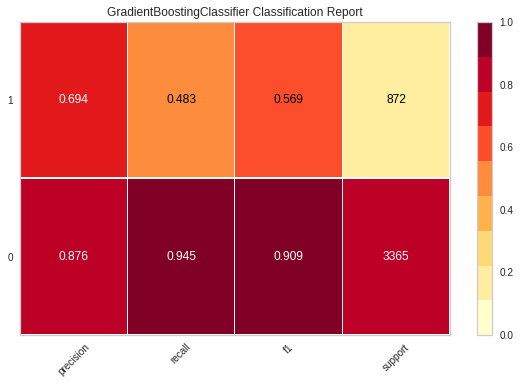

In [14]:
plot_model(model, plot='class_report')

In [15]:
interpret_model(model)

TypeError: This function only supports tree based models for binary classification: lightgbm, dt, xgboost, et, rf.

In [ ]:
interpret_model(model, plot='correlation')

In [16]:
model_pred_holdout = predict_model(model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8497,0.8430,0.4828,0.6936,0.5693,0.4818,0.4934


In [17]:
test1 = test.copy()

In [18]:
del test['var2']
del test['var8']
del test['var15']
del test['var26']
del test['var31']
del test['var37']
del test['var38']
del test['var39']
del test['var41']
del test['var44']
del test['var45']
del test['var46']
del test['var47']
del test['var48']
del test['var50']
del test['var51']
del test['var52']
del test['var55']
del test['var56']
del test['var57']
del test['var58']
del test['var59']
del test['var61']
del test['var64']
del test['var65']
del test['var66']
del test['var67']
del test['var68']

In [19]:
model_pred_new = predict_model(model, data = test) #new_data is pd dataframe

In [20]:
model_pred_new['Label'].value_counts()

0    18238
1     2945
Name: Label, dtype: int64

In [21]:
train['y'].value_counts()

0    11273
1     2850
Name: y, dtype: int64

### Calibrando a mesma quantidade de instâncias a serem usadas. 

**Vemos que a classe está desbalanceada, o que está causando um problema no treinamento do modelo. Como a casse está desbalanceada, ele está aprendendo muito com a classe com a maior quantidade de classes. Então vamos deixar 50% cada, e ver como o modelo se comporta.**

In [6]:
train2 = train.loc[train['y']==0].head(2850)

In [7]:
train21 = train.loc[train['y']==1]

In [8]:
train3 = pd.concat([train2,train21])
train3

,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,var13,var14,var15,var16,var17,var18,var19,var20,var21,var22,var23,var24,var25,var26,var27,var28,var29,var30,var31,var32,var33,var34,var35,var36,var37,var38,var39,var40,var41,var42,var43,var44,var45,var46,var47,var48,var49,var50,var51,var52,var53,var54,var55,var56,var57,var58,var59,var60,var61,var62,var63,var64,var65,var66,var67,var68,y
1,4,110,1986,13684,7189,0,0,17,3,63,13989,497,2289,16,1,3,3,3,1797,16,2417,5,1,2,1,6,1,4,2,1,0,14,0,1,532,2,1,0,4,7,3,30,3,0,0,0,0,0,0,0,0,20,1,1,0.228784,0.308,0.305376,0.069325,0.248909,-999.000000,-999.000000,0.070991,0.773966,0.019315,-999.000000,-999.000000,0.147059,0.106618,0
2,0,39,1019,10232,678,791,16,0,3,63,9739,562,641,10,34,34,10,4,511,10,664,5,3,2,1,7,0,3,4,1,0,11,1,3,81,26,3,0,4,3,3,23,5,1,0,0,0,0,0,0,0,12,1,1,0.204636,0.213,0.451613,0.018639,0.214520,-999.000000,0.200814,0.051046,0.980827,0.018536,-999.000000,-999.000000,0.382353,0.242647,0
3,20,39,1751,2689,8235,1042,13,10,1,14,2890,6541,811,8,59,60,23,5,624,8,839,0,0,0,0,1,1,19,1,2,0,8,0,11,414,27,0,0,4,10,3,22,10,1,1,1,0,1,1,0,0,36,1,1,0.208299,0.716,0.101075,0.204753,0.349421,-999.000000,0.352379,0.044301,0.951564,0.023684,0.363370,0.002010,0.147059,0.132353,0
5,18,0,0,16114,208,0,0,0,1,63,16938,7322,1247,2,58,58,22,5,943,2,1301,0,2,0,0,6,0,9,3,2,0,13,5,9,474,2,21,0,4,2,3,28,4,1,0,0,0,0,1,0,0,15,1,1,0.221367,0.497,0.101075,0.026035,-999.000000,0.057837,0.391608,0.080977,0.897074,0.019915,-999.000000,-999.000000,0.000000,0.198529,0
6,5,89,1906,28845,9676,64,35,27,3,63,15320,3658,26,26,40,42,8,4,22,26,32,5,3,0,1,4,0,24,4,1,0,14,5,53,197,2,3,0,4,2,3,24,5,1,0,0,0,0,0,0,1,30,1,1,0.205834,0.014,1.000000,0.007534,0.141888,-999.000000,0.145790,0.035340,0.867810,0.014831,-999.000000,-999.000000,0.514706,0.224265,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14080,19,39,1260,24416,3030,2435,35,0,3,63,26783,2847,2007,26,7,9,9,4,814,26,2068,1,3,2,1,7,1,24,4,1,0,17,4,44,70,2,2,0,1,6,3,11,8,1,0,0,0,0,0,0,0,49,2,2,0.209005,0.225,0.451613,0.021096,0.024667,0.223968,0.198970,0.010728,0.963673,0.013745,-999.000000,-999.000000,0.264706,0.250000,1
14094,2,126,3437,28361,8085,2761,35,27,3,63,24166,4068,2007,26,13,11,11,4,1012,26,2255,5,3,2,1,7,1,24,4,1,0,17,2,5,346,21,0,9,1,11,8,24,11,1,0,0,0,0,0,0,0,37,2,2,0.212026,0.205,0.451613,0.026073,0.211489,0.537752,0.321195,0.130228,0.944501,0.106245,-999.000000,-999.000000,0.294118,0.216912,1
14099,22,92,2198,26648,2652,2453,35,0,3,63,29592,2311,2033,26,2,2,2,2,1573,26,2093,3,3,0,4,7,1,24,4,2,0,10,4,28,568,0,25,0,4,9,3,25,5,1,4,2,2,1,1,0,0,41,2,2,0.211363,0.025,1.000000,0.017403,0.348089,0.202229,0.170415,0.046391,0.943491,0.041939,0.452245,0.005528,0.191176,0.198529,1
14101,4,126,2946,29089,3018,482,35,27,3,63,16793,2817,399,26,5,12,12,4,307,26,426,4,3,0,4,1,0,24,4,2,0,12,1,0,569,0,25,0,4,0,3,28,7,0,0,0,0,0,0,0,0,25,2,2,0.208477,0.590,0.101075,0.151210,0.267694,0.672057,0.207736,0.086144,0.894046,0.041939,-999.000000,-999.000000,0.426471,0.194853,1


In [25]:
model1 = setup(train3, target = 'y', session_id=123, normalize=True)

,Description,Value
0,session_id,123
1,Target,y
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(5700, 41)"
5,Missing Values,False
6,Numeric Features,26
7,Categorical Features,14
8,Ordinal Features,False
9,High Cardinality Features,False


In [26]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8363,0.9135,0.8157,0.8502,0.8324,0.6726,0.6733,1.2510
catboost,CatBoost Classifier,0.8328,0.9128,0.8213,0.8401,0.8305,0.6656,0.6659,9.4470
lightgbm,Light Gradient Boosting Machine,0.8308,0.9103,0.8117,0.8430,0.8269,0.6615,0.6621,0.2360
ada,Ada Boost Classifier,0.8283,0.9092,0.8238,0.8307,0.8270,0.6565,0.6569,0.3390
xgboost,Extreme Gradient Boosting,0.8253,0.9029,0.8127,0.8329,0.8225,0.6505,0.6509,5.4760
rf,Random Forest Classifier,0.8235,0.9014,0.7961,0.8414,0.8180,0.6469,0.6481,0.6820
et,Extra Trees Classifier,0.7924,0.8775,0.7547,0.8148,0.7834,0.5847,0.5865,0.5460
lr,Logistic Regression,0.7917,0.8768,0.7946,0.7888,0.7915,0.5834,0.5836,0.2650
ridge,Ridge Classifier,0.7894,0.0000,0.7925,0.7865,0.7893,0.5789,0.5791,0.0330
lda,Linear Discriminant Analysis,0.7892,0.8742,0.7920,0.7863,0.7890,0.5784,0.5786,0.1550


In [28]:
%%time
model2 = create_model('gbc', fold=20)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8100,0.9044,0.8081,0.8081,0.8081,0.6200,0.6200
1,0.7950,0.8995,0.7879,0.7959,0.7919,0.5899,0.5899
2,0.8500,0.9141,0.7980,0.8876,0.8404,0.6997,0.7032
3,0.8100,0.9086,0.8200,0.8039,0.8119,0.6200,0.6201
4,0.8300,0.9156,0.7700,0.8750,0.8191,0.6600,0.6648
5,0.8550,0.9379,0.9000,0.8257,0.8612,0.7100,0.7129
6,0.8700,0.9355,0.8400,0.8936,0.8660,0.7400,0.7413
7,0.8400,0.9254,0.8200,0.8542,0.8367,0.6800,0.6805
8,0.8350,0.8968,0.7700,0.8851,0.8235,0.6700,0.6757
9,0.8744,0.9246,0.8687,0.8776,0.8731,0.7487,0.7488


CPU times: user 4.2 s, sys: 28.9 ms, total: 4.23 s
Wall time: 26.2 s


In [29]:
%%time
tuned2 = tune_model(model2)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7870,0.8913,0.7980,0.7783,0.7880,0.5740,0.5742
1,0.8221,0.9058,0.7677,0.8588,0.8107,0.6438,0.6474
2,0.8446,0.9108,0.8586,0.8333,0.8458,0.6893,0.6896
3,0.8471,0.9204,0.8392,0.8520,0.8456,0.6942,0.6943
4,0.8221,0.8957,0.7889,0.8441,0.8156,0.6440,0.6454
5,0.8221,0.8946,0.7990,0.8368,0.8175,0.6441,0.6447
6,0.8722,0.9419,0.8492,0.8895,0.8689,0.7443,0.7451
7,0.8095,0.8795,0.7990,0.8154,0.8071,0.6190,0.6192
8,0.8120,0.8961,0.8191,0.8069,0.8130,0.6241,0.6241
9,0.8442,0.9068,0.8232,0.8579,0.8402,0.6884,0.6889


CPU times: user 11.6 s, sys: 70.8 ms, total: 11.7 s
Wall time: 2min 31s


In [ ]:
%%time
tuned2 = tune_model(model2, optimize='Accuracy')

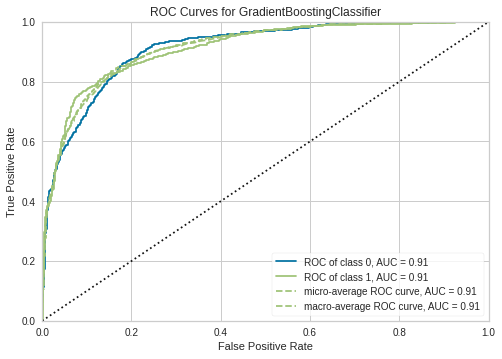

CPU times: user 665 ms, sys: 39.8 ms, total: 705 ms
Wall time: 693 ms


In [30]:
%%time
plot_model(model2)

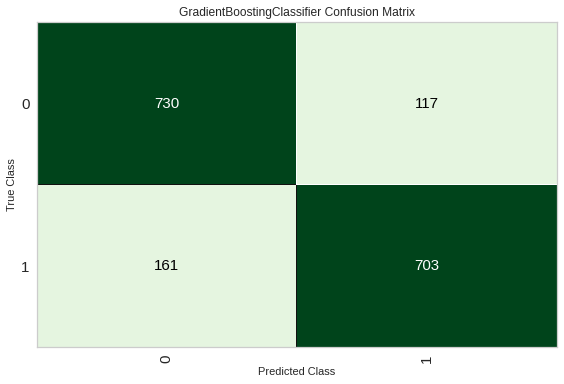

CPU times: user 616 ms, sys: 132 ms, total: 748 ms
Wall time: 566 ms


In [31]:
%%time
plot_model(model2, plot='confusion_matrix')

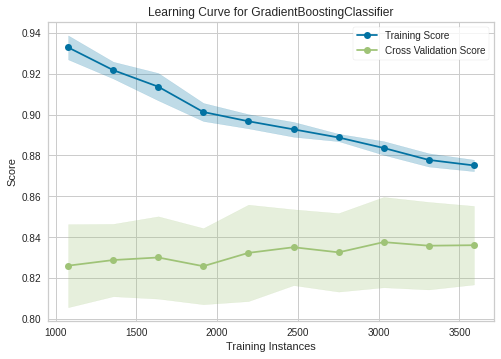

CPU times: user 1.25 s, sys: 28.7 ms, total: 1.28 s
Wall time: 1min 25s


In [32]:
%%time
plot_model(model2, plot='learning')

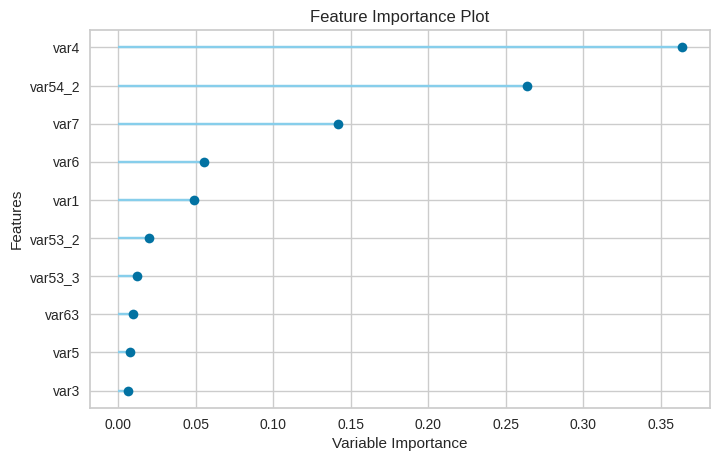

CPU times: user 613 ms, sys: 16.3 ms, total: 629 ms
Wall time: 620 ms


In [35]:
%%time
plot_model(model2, plot='feature')

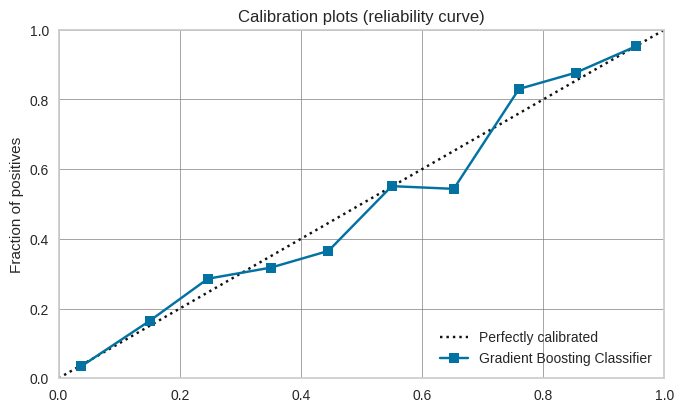

CPU times: user 679 ms, sys: 186 ms, total: 865 ms
Wall time: 631 ms


In [36]:
%%time
plot_model(model2, plot='calibration')

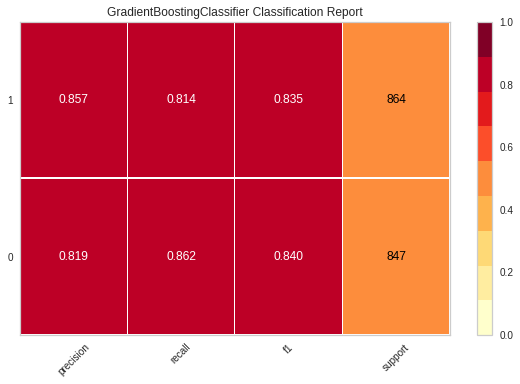

CPU times: user 808 ms, sys: 200 ms, total: 1.01 s
Wall time: 774 ms


In [37]:
%%time
plot_model(model2, plot='class_report')

In [38]:
%%time
interpret_model(model2)

TypeError: This function only supports tree based models for binary classification: catboost, lightgbm, dt, xgboost, et, rf.

In [39]:
%%time
interpret_model(model2, plot = 'correlation')

TypeError: This function only supports tree based models for binary classification: catboost, lightgbm, dt, xgboost, et, rf.

In [40]:
model_pred_holdout = predict_model(model2)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8375,0.9115,0.8137,0.8573,0.8349,0.6752,0.6761


In [41]:
model_pred_new2 = predict_model(model2, data = test) #new_data is pd dataframe

In [42]:
model_pred_new2['Label'].value_counts()

1    14193
0     6990
Name: Label, dtype: int64

In [43]:
df = pd.DataFrame()
df['id'] = model_pred_new2['id']
df['predicted'] = model_pred_new2['Label']

In [44]:
df.to_csv('sub2.csv',index=False)

# Ensemble Model

In [49]:
# lets create a simple decision tree model that we will use for ensembling 
moodel2 = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8045,0.8958,0.8081,0.8000,0.8040,0.6090,0.6091
1,0.8296,0.9119,0.8081,0.8421,0.8247,0.6590,0.6596
2,0.8346,0.9176,0.8131,0.8474,0.8299,0.6691,0.6696
3,0.8622,0.9286,0.8291,0.8871,0.8571,0.7243,0.7258
4,0.8446,0.9082,0.8141,0.8663,0.8394,0.6892,0.6904
5,0.8246,0.9119,0.8040,0.8377,0.8205,0.6491,0.6496
6,0.8697,0.9458,0.8291,0.9016,0.8639,0.7393,0.7417
7,0.8221,0.8858,0.8191,0.8232,0.8212,0.6441,0.6441
8,0.8195,0.9060,0.7990,0.8325,0.8154,0.6391,0.6396
9,0.8518,0.9231,0.8333,0.8639,0.8483,0.7035,0.7039


### Bagging

In [50]:
%%time
bagged = ensemble_model(model2)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7995,0.8992,0.8081,0.7921,0.8000,0.5990,0.5992
1,0.8246,0.9057,0.7879,0.8478,0.8168,0.6489,0.6505
2,0.8296,0.9214,0.8232,0.8316,0.8274,0.6591,0.6591
3,0.8546,0.9271,0.8392,0.8653,0.8520,0.7092,0.7096
4,0.8471,0.9084,0.8191,0.8670,0.8424,0.6942,0.6952
5,0.8296,0.9136,0.8141,0.8394,0.8265,0.6591,0.6594
6,0.8647,0.9440,0.8342,0.8877,0.8601,0.7293,0.7306
7,0.8195,0.8880,0.8241,0.8159,0.8200,0.6391,0.6391
8,0.8195,0.9055,0.8040,0.8290,0.8163,0.6391,0.6394
9,0.8467,0.9208,0.8182,0.8663,0.8416,0.6934,0.6944


CPU times: user 28.5 s, sys: 16.7 ms, total: 28.5 s
Wall time: 1min 56s


In [65]:
# check the parameters of bagged_dt
print(bagged)

BaggingClassifier(base_estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                            criterion='friedman_mse',
                                                            init=None,
                                                            learning_rate=0.1,
                                                            loss='deviance',
                                                            max_depth=3,
                                                            max_features=None,
                                                            max_leaf_nodes=None,
                                                            min_impurity_decrease=0.0,
                                                            min_impurity_split=None,
                                                            min_samples_leaf=1,
                                                            min_samples_split=2,
                                              

### Boosting

In [66]:
%%time
boosted = ensemble_model(model2, method = 'Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8070,0.8876,0.8081,0.8040,0.8060,0.6140,0.6140
1,0.8170,0.9091,0.7980,0.8272,0.8123,0.6340,0.6344
2,0.8346,0.9089,0.8283,0.8367,0.8325,0.6691,0.6692
3,0.8346,0.9151,0.8643,0.8152,0.8390,0.6692,0.6704
4,0.8120,0.8909,0.8040,0.8163,0.8101,0.6240,0.6241
5,0.8145,0.8959,0.8342,0.8019,0.8177,0.6291,0.6296
6,0.8647,0.9370,0.8392,0.8836,0.8608,0.7293,0.7302
7,0.7945,0.8821,0.7940,0.7940,0.7940,0.5890,0.5890
8,0.8195,0.8916,0.8141,0.8223,0.8182,0.6391,0.6391
9,0.8543,0.9075,0.8586,0.8500,0.8543,0.7086,0.7086


CPU times: user 1min 18s, sys: 231 ms, total: 1min 18s
Wall time: 3min 58s


In [67]:
%%time
bagged2 = ensemble_model(model2, n_estimators=50)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8045,0.8999,0.8081,0.8000,0.8040,0.6090,0.6091
1,0.8271,0.9085,0.7929,0.8486,0.8198,0.6539,0.6553
2,0.8346,0.9206,0.8232,0.8402,0.8316,0.6691,0.6692
3,0.8596,0.9296,0.8392,0.8743,0.8564,0.7193,0.7198
4,0.8471,0.9101,0.8191,0.8670,0.8424,0.6942,0.6952
5,0.8271,0.9137,0.8040,0.8421,0.8226,0.6541,0.6548
6,0.8697,0.9444,0.8442,0.8889,0.8660,0.7393,0.7402
7,0.8195,0.8887,0.8291,0.8128,0.8209,0.6391,0.6392
8,0.8145,0.9079,0.7940,0.8272,0.8103,0.6290,0.6295
9,0.8467,0.9217,0.8232,0.8624,0.8424,0.6934,0.6941


CPU times: user 2min 58s, sys: 212 ms, total: 2min 58s
Wall time: 11min 36s


In [68]:
# check the parameters of the tuned Decision Tree with bagging
print(bagged2)

BaggingClassifier(base_estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                            criterion='friedman_mse',
                                                            init=None,
                                                            learning_rate=0.1,
                                                            loss='deviance',
                                                            max_depth=3,
                                                            max_features=None,
                                                            max_leaf_nodes=None,
                                                            min_impurity_decrease=0.0,
                                                            min_impurity_split=None,
                                                            min_samples_leaf=1,
                                                            min_samples_split=2,
                                              

### Blending

In [ ]:
top3 = compare_models(n_select = 3)

In [ ]:
blend_hard = blend_models(top3)

In [ ]:
blend_soft = blend_models(top3, method = 'soft')

In [ ]:
"""
we will create 4 specific models to be passed into blend_models().
Note that verbose is set to False to avoid printing the score grid of individual models.
"""

gbc = create_model('gbc', verbose = False)
rf = create_model('rf', verbose = False)
lightgbm = create_model('lightgbm', verbose = False)
ada = create_model('ada', verbose = False)

In [ ]:
%%time
blend_specific_soft = blend_models(estimator_list = [gbc,rf,lightgbm,ada], method = 'soft')

In [ ]:
%%time
blend_specific_hard = blend_models(estimator_list = [gbc,rf,lightgbm,ada], method = 'hard')

### Verificar os gráficos e resultados do modelo escolhido

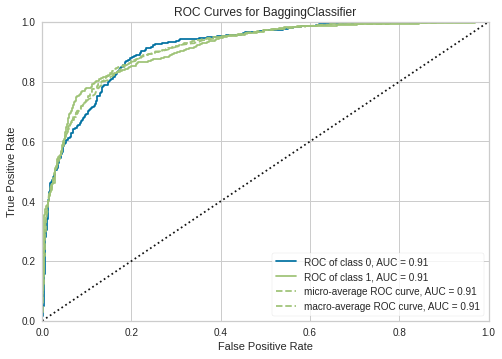

In [69]:
plot_model(bagged2 )

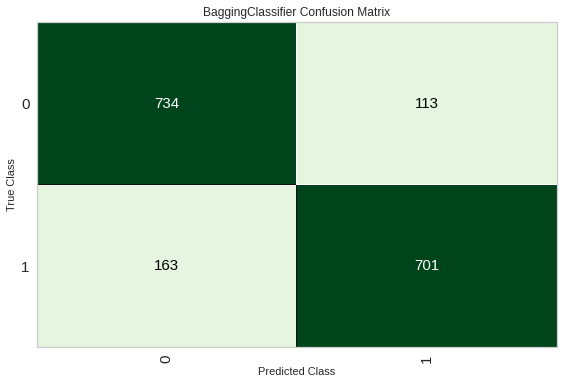

In [70]:
plot_model(bagged2, plot='confusion_matrix')

In [71]:
%%time
plot_model(bagged2, plot='feature')

TypeError: Feature Importance and RFE plots not available for estimators that doesnt support coef_ or feature_importances_ attribute.

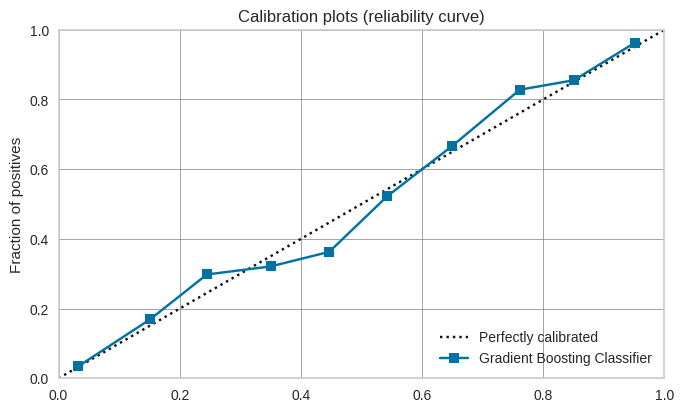

CPU times: user 2.26 s, sys: 184 ms, total: 2.45 s
Wall time: 2.24 s


In [72]:
%%time
plot_model(bagged2, plot='calibration')

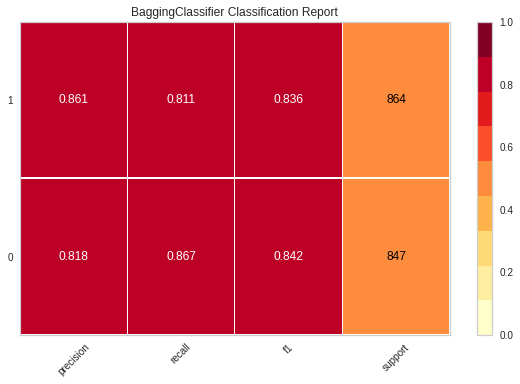

In [73]:
plot_model(bagged2, plot='class_report')

In [74]:
interpret_model(bagged2)

TypeError: This function only supports tree based models for binary classification: rf, lightgbm, dt, xgboost, et.

In [75]:
model_pred_holdout = predict_model(bagged2)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8387,0.9115,0.8113,0.8612,0.8355,0.6775,0.6787


In [76]:
model_pred_new3 = predict_model(bagged2, data = test) #new_data is pd dataframe

In [77]:
model_pred_new3['Label'].value_counts()

1    14330
0     6853
Name: Label, dtype: int64

In [78]:
df = pd.DataFrame()
df['id'] = model_pred_new3['id']
df['predicted'] = model_pred_new1['Label']

In [ ]:
df.to_csv('sub.csv',index=False)

In [ ]:
a = pd.read_csv('sub1.csv')
a

In [114]:
!mkdir ~/.kaggle

mkdir: não foi possível criar o diretório “/home/felipe/.kaggle”: Arquivo existe


In [115]:
!cp /home/felipe/Downloads/kaggle.json /home/felipe/.kaggle/kaggle.json

In [116]:
!cd /home/felipe/.kaggle/ && ls

kaggle.json


In [117]:
!kaggle datasets list -s 'Porto Seguro'

ref                                                      title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
aharless/porto-seguro-public-kernel-results              Porto Seguro public kernel results                  3KB  2017-12-01 22:06:38             42         10  0.7647059        
vpaslay/kaggleportosegurosubmissions                     kaggle-porto-seguro-submissions                    34MB  2017-11-12 13:49:51           2059          1  0.4117647        
pushero/porto-seguros-safe-driver-prediction-test-data   Porto Seguro’s Safe Driver Prediction test data    44MB  2017-10-03 09:54:36            154          3  0.47058824       
ogrellier/porto-seguros-safe-driver-noisy-features       porto seguro's safe driver noisy features       

In [118]:
!kaggle competitions submit -c porto-seguro-data-challenge -f submission_clf.csv -m "SUBMISSÃO 3"

100%|████████████████████████████████████████| 159k/159k [00:02<00:00, 70.3kB/s]
Successfully submitted to Porto Seguro Data Challenge

## SEM USAR O PYCARET

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgbm
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report,confusion_matrix

## Recarregar os arquivos

In [10]:
train = pd.read_csv('train.csv', sep=',')
train

,id,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,var13,var14,var15,var16,var17,var18,var19,var20,var21,var22,var23,var24,var25,var26,var27,var28,var29,var30,var31,var32,var33,var34,var35,var36,var37,var38,var39,var40,var41,var42,var43,var44,var45,var46,var47,var48,var49,var50,var51,var52,var53,var54,var55,var56,var57,var58,var59,var60,var61,var62,var63,var64,var65,var66,var67,var68,y
0,1,18,19,2853,29442,1386,2435,35,-999,3,63,6498,1166,2007,26,13,11,11,4,1547,26,2068,1,3,0,4,7,0,24,4,2,0,16,3,44,463,27,2,0,4,9,3,25,6,1,4,3,1,0,0,0,0,42,1,1,0.212414,0.137,0.833333,0.037822,0.058070,0.311441,0.142303,0.056146,0.632694,0.024054,0.253356,0.00603,0.132353,0.139706,1
1,8,4,110,1986,13684,7189,-999,-999,17,3,63,13989,497,2289,16,1,3,3,3,1797,16,2417,5,1,2,1,6,1,4,2,1,0,14,0,1,532,2,1,0,4,7,3,30,3,0,0,0,0,0,0,0,0,20,1,1,0.228784,0.308,0.305376,0.069325,0.248909,-999.000000,-999.000000,0.070991,0.773966,0.019315,-999.000000,-999.00000,0.147059,0.106618,0
2,30,0,39,1019,10232,678,791,16,-999,3,63,9739,562,641,10,34,34,10,4,511,10,664,5,3,2,1,7,0,3,4,1,0,11,1,3,81,26,3,0,4,3,3,23,5,1,0,0,0,0,0,0,0,12,1,1,0.204636,0.213,0.451613,0.018639,0.214520,-999.000000,0.200814,0.051046,0.980827,0.018536,-999.000000,-999.00000,0.382353,0.242647,0
3,43,20,39,1751,2689,8235,1042,13,10,1,14,2890,6541,811,8,59,60,23,5,624,8,839,0,0,0,0,1,1,19,1,2,0,8,0,11,414,27,0,0,4,10,3,22,10,1,1,1,0,1,1,0,0,36,1,1,0.208299,0.716,0.101075,0.204753,0.349421,-999.000000,0.352379,0.044301,0.951564,0.023684,0.363370,0.00201,0.147059,0.132353,0
4,46,7,44,2262,29428,6031,304,16,-999,3,63,13541,7238,260,10,55,56,20,5,1413,10,270,2,3,2,1,8,1,3,4,1,0,17,4,3,567,8,3,2,4,5,3,26,5,1,0,0,0,0,1,0,0,19,1,1,0.222896,0.596,0.101075,0.140394,0.189641,0.021226,0.226161,0.059125,0.906155,0.020733,-999.000000,-999.00000,0.455882,0.132353,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14118,35295,4,39,2511,28766,1109,2094,31,24,3,-999,5082,-999,1678,23,55,56,20,5,198,23,1739,5,4,2,1,7,0,26,5,1,0,17,5,12,314,0,1,0,4,2,3,23,5,1,0,0,0,0,0,0,0,25,2,2,0.227307,0.048,0.978495,0.063199,0.122448,-999.000000,0.069347,0.036178,0.869828,0.016160,-999.000000,-999.00000,0.455882,0.147059,0
14119,35296,19,129,1114,-999,6376,-999,-999,27,-999,-999,-999,-999,1387,13,-999,-999,-999,-999,719,13,1445,5,1,1,2,-999,0,24,4,1,0,13,6,25,532,27,1,0,4,10,1,26,13,1,0,0,0,0,0,1,0,-999,0,0,0.210104,-999.000,-999.000000,-999.000000,-999.000000,-999.000000,0.295418,0.055899,0.921292,0.018293,-999.000000,-999.00000,0.147059,0.198529,0
14120,35301,27,44,1786,23761,9048,623,35,27,3,14,1249,882,358,26,34,34,10,4,482,26,380,5,3,2,1,7,0,24,4,1,0,17,3,44,362,2,0,0,4,1,3,25,4,1,0,0,0,0,0,0,0,16,2,2,0.217944,0.029,1.000000,0.034263,0.207001,-999.000000,0.203394,0.040697,0.930373,0.009440,-999.000000,-999.00000,0.397059,0.158088,0
14121,35304,4,89,210,19593,3634,2453,35,27,1,63,21128,3849,2033,26,55,56,20,5,1573,26,2093,3,3,0,0,7,0,24,4,2,0,16,2,24,553,0,18,0,4,1,3,28,14,1,0,0,0,0,1,0,1,21,2,2,0.209336,0.154,0.833333,0.022503,0.200405,0.070788,0.381038,0.100384,0.680121,0.041096,-999.000000,-999.00000,0.264706,0.128676,0


In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X = train3.drop('y', axis=1)
y = train3['y']

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=48)

In [77]:
log_cv = LogisticRegressionCV(random_state=48, cv=10).fit(X_train,y_train)
logmodel1 = log_cv.predict(X_test)
logmodel1
log_cv.score(X_train, y_train)


0.7216374269005847

In [78]:
logmodel1

array([0, 1, 1, ..., 1, 0, 1])

### Validação Cruzada - Modelo Floresta Aleatória

In [92]:
%%time
random_clf = RandomForestClassifier(random_state=48).fit(X_train,y_train)
resul_clf = random_clf.predict(X_test)
random_clf.score(X_test, y_test)


CPU times: user 1.99 s, sys: 7.64 ms, total: 2 s
Wall time: 2 s


0.8532163742690059

In [91]:
scores_clf = cross_val_score(random_clf, X, y, cv=15, scoring='accuracy')
scores_clf.mean()

0.8396491228070176

In [90]:
print(classification_report(y_test, resul_clf))
print('\n')
print(confusion_matrix(y_test, resul_clf))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85       851
           1       0.85      0.86      0.85       859

    accuracy                           0.85      1710
   macro avg       0.85      0.85      0.85      1710
weighted avg       0.85      0.85      0.85      1710



[[719 132]
 [119 740]]


### Validação Cruzada - Árvore de Decisão


In [119]:
%%time
tree_clf = DecisionTreeClassifier(random_state=48).fit(X_train,y_train)
resul_tree = cross_val_predict(tree_clf,X_train, y_train, cv=100)
score_tree = cross_val_score(X_test, y_test, cv=100)
score_tree.mean()

TypeError: fit() missing 1 required positional argument: 'y'

In [19]:
print(classification_report(classes, resul_tree))
print('\n')
print(confusion_matrix(classes, resul_tree))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77      2850
           1       0.77      0.77      0.77      2850

    accuracy                           0.77      5700
   macro avg       0.77      0.77      0.77      5700
weighted avg       0.77      0.77      0.77      5700



[[2203  647]
 [ 649 2201]]


### Validação Cruzada - Boosting

In [20]:
%%time
gbc_clf = GradientBoostingClassifier(random_state=48)
resul_gbc = cross_val_predict(gbc_clf,dataset, classes, cv=100)
score_gbc = cross_val_score(gbc_clf,dataset, classes, cv=100)
score_gbc.mean()


CPU times: user 25min 32s, sys: 412 ms, total: 25min 32s
Wall time: 25min 35s


0.850701754385965

In [21]:
print(classification_report(classes, resul_gbc))
print('\n')
print(confusion_matrix(classes, resul_gbc))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85      2850
           1       0.86      0.84      0.85      2850

    accuracy                           0.85      5700
   macro avg       0.85      0.85      0.85      5700
weighted avg       0.85      0.85      0.85      5700



[[2445  405]
 [ 446 2404]]


## Validação Cruzada - lightgbm

In [22]:
%%time
light_clf = lgbm.LGBMClassifier(random_state=48)
resul_light = cross_val_predict(light_clf,dataset, classes, cv=100)

CPU times: user 3min 32s, sys: 1.99 s, total: 3min 34s
Wall time: 57.4 s


In [23]:
%%time
score_light = cross_val_score(light_clf,dataset, classes, cv=100)
score_light.mean()

CPU times: user 3min 29s, sys: 2.29 s, total: 3min 31s
Wall time: 56.4 s


0.8480701754385964

In [24]:
print(classification_report(classes, resul_light))
print('\n')
print(confusion_matrix(classes, resul_light))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      2850
           1       0.86      0.84      0.85      2850

    accuracy                           0.85      5700
   macro avg       0.85      0.85      0.85      5700
weighted avg       0.85      0.85      0.85      5700



[[2447  403]
 [ 463 2387]]


## Feature Importance

### Árvore de Decisão

In [25]:
X = train.drop('y',axis=1)
y = train['y']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=48)

In [27]:
dtree = DecisionTreeClassifier(random_state=48)
dtree.fit(X_train,y_train)
dtree.feature_importances_

feature_imp = pd.Series(dtree.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

var4     0.280615
var8     0.061242
var6     0.036117
var55    0.032991
id       0.028488
var63    0.024006
var35    0.022707
var56    0.021843
var64    0.021298
var5     0.019609
var3     0.019153
var11    0.018620
var52    0.018602
var67    0.018288
var61    0.017326
var58    0.017113
var2     0.015879
var12    0.014683
var1     0.014583
var59    0.014550
var21    0.014122
var19    0.013605
var13    0.013481
var62    0.012599
var42    0.012584
var7     0.012413
var40    0.012191
var33    0.012177
var36    0.010677
var34    0.010514
var68    0.010455
var15    0.010356
var57    0.010166
var32    0.009649
var60    0.009059
var14    0.008675
var17    0.007795
var26    0.007782
var16    0.006789
var54    0.006233
var37    0.005966
var30    0.005153
var22    0.004990
var25    0.004862
var43    0.004585
var38    0.004375
var66    0.004260
var41    0.003743
var65    0.003625
var39    0.003603
var45    0.002864
var53    0.002742
var28    0.002495
var51    0.002409
var50    0.002307
var46    0

In [28]:
def visualiza_features_importantes(features_lista):
    %matplotlib inline

    plt.figure(figsize=(16,8))
    sns.barplot(x=features_lista, y=features_lista.index)

    plt.xlabel('Feature Importance Score')
    plt.ylabel('Features')
    plt.title("Visualizing Important Features")
    plt.show()

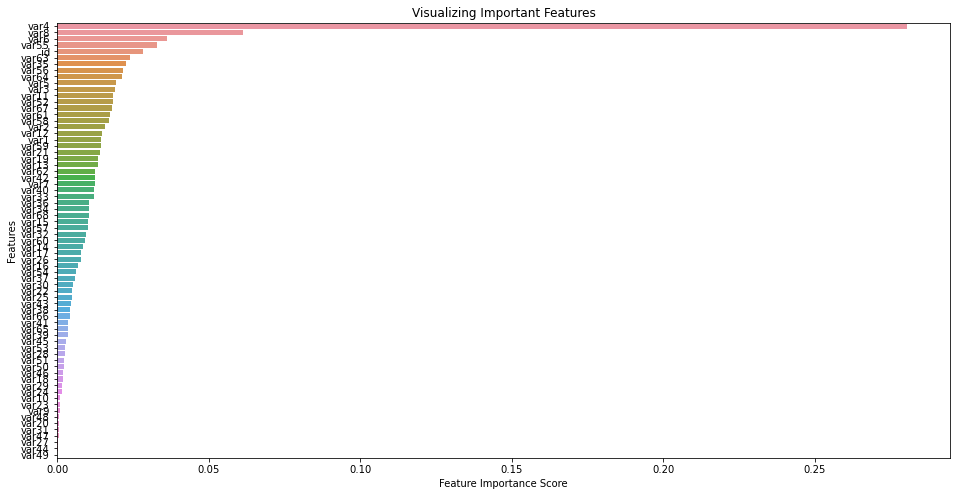

In [29]:
visualiza_features_importantes(feature_imp)

In [30]:
feature_selecionadas = []
for feature, importancia in feature_imp.iteritems():
  if importancia >0.01:
    print("{}:\t{}".format(feature, importancia))
    feature_selecionadas.append(feature)

var4:	0.28061465483065917
var8:	0.06124167176807788
var6:	0.03611692967560149
var55:	0.03299141496956285
id:	0.028488231973722637
var63:	0.024005673980856013
var35:	0.022706544174077678
var56:	0.021843260659362786
var64:	0.02129809400812988
var5:	0.01960872384697343
var3:	0.019152511062974775
var11:	0.018620138013581623
var52:	0.01860198257647285
var67:	0.018288226332820224
var61:	0.01732560339690992
var58:	0.017112999469721498
var2:	0.015878865205164593
var12:	0.014683288338064107
var1:	0.014583340714378501
var59:	0.014550455931564897
var21:	0.014122111483362336
var19:	0.01360486073781414
var13:	0.013480794809960046
var62:	0.012598966975309737
var42:	0.012583777281408175
var7:	0.0124125054442655
var40:	0.01219128878444191
var33:	0.012176884885393006
var36:	0.010677248244651397
var34:	0.010513636815524514
var68:	0.01045464195774328
var15:	0.01035592269967313
var57:	0.010166354463440264


### Feature Importance para o modelo de Arvore de Decisão na Validação Cruzada

In [31]:
dataset1 = train[feature_selecionadas]
classes1 = train['y']

In [32]:
tree_clf1 = DecisionTreeClassifier(random_state=48)
resul_tree1 = cross_val_predict(tree_clf1,dataset1, classes1, cv=80)

In [33]:
score_tree1 = cross_val_score(tree_clf1,dataset1, classes1, cv=80)
score_tree1.mean()

0.7914612223934258

In [34]:
print(classification_report(classes1, resul_tree1))
print('\n')
print(confusion_matrix(classes1, resul_tree1))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87     11273
           1       0.48      0.53      0.51      2850

    accuracy                           0.79     14123
   macro avg       0.68      0.69      0.69     14123
weighted avg       0.80      0.79      0.79     14123



[[9665 1608]
 [1337 1513]]


### Floresta Aleatória

In [35]:
%%time
rfc = RandomForestClassifier(n_estimators=600)
rfc.fit(X_train,y_train)
feature_imp = pd.Series(rfc.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

var4     0.160212
var8     0.086938
var6     0.025306
var55    0.024883
var56    0.022365
var11    0.021669
var5     0.021244
var3     0.021180
var63    0.020738
id       0.020436
var52    0.019916
var62    0.019693
var35    0.019647
var1     0.019524
var58    0.019520
var61    0.019047
var64    0.018802
var67    0.018606
var59    0.018263
var7     0.017753
var12    0.017357
var68    0.016917
var34    0.014978
var32    0.014447
var21    0.014408
var19    0.014163
var13    0.014042
var2     0.013733
var42    0.013717
var40    0.013448
var60    0.012740
var43    0.012409
var57    0.012409
var16    0.012273
var15    0.011857
var37    0.011146
var17    0.011140
var36    0.010357
var54    0.010144
var20    0.009880
var33    0.009591
var26    0.009435
var14    0.007851
var23    0.006545
var10    0.006173
var28    0.006129
var18    0.005645
var25    0.005584
var53    0.005474
var22    0.004786
var65    0.004560
var38    0.004387
var41    0.004360
var24    0.004205
var29    0.003788
var9     0

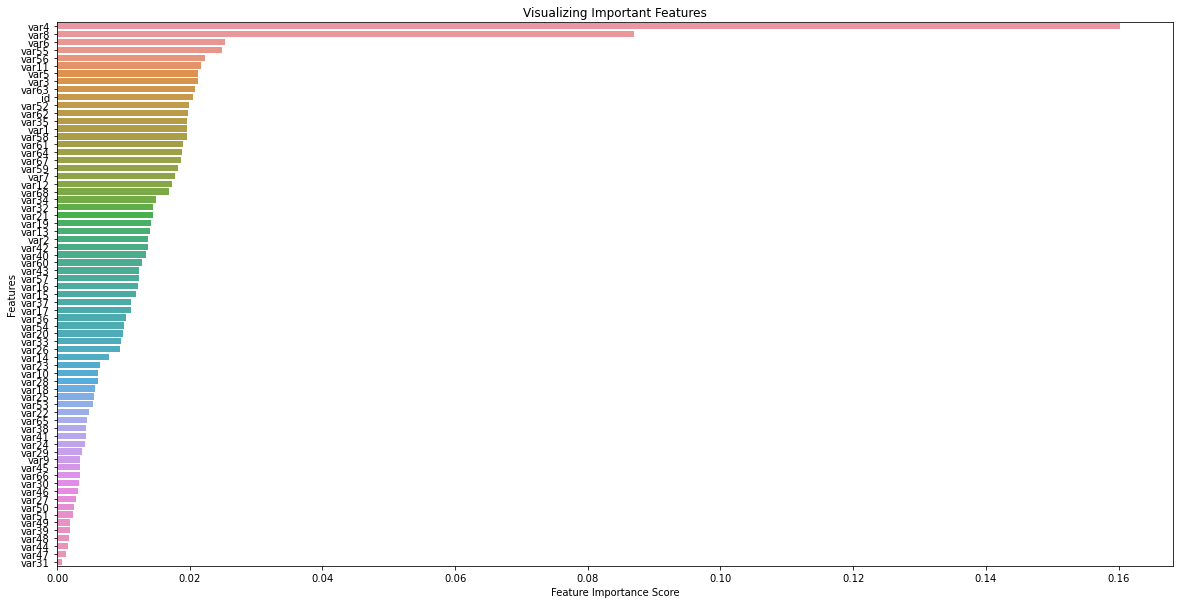

In [36]:
def visualiza_features_importantes(features_lista):
    %matplotlib inline

    plt.figure(figsize=(20,10))
    sns.barplot(x=features_lista, y=features_lista.index)

    plt.xlabel('Feature Importance Score')
    plt.ylabel('Features')
    plt.title("Visualizing Important Features")
    plt.show()
    
visualiza_features_importantes(feature_imp)

In [37]:
feature_selecionadas = []
for feature, importancia in feature_imp.iteritems():
  if importancia >0.01:
    print("{}:\t{}".format(feature, importancia))
    feature_selecionadas.append(feature)

var4:	0.16021189335719194
var8:	0.08693784721238591
var6:	0.025306336742384625
var55:	0.024882837473484593
var56:	0.022364899568282928
var11:	0.021669176010260915
var5:	0.021243791408444394
var3:	0.02117998443441801
var63:	0.020737566799609825
id:	0.020435809574078815
var52:	0.019916229921096765
var62:	0.019692747884902693
var35:	0.019646992621834024
var1:	0.01952394028137477
var58:	0.019520177330003493
var61:	0.019046874876636203
var64:	0.018802406493386357
var67:	0.0186061445218593
var59:	0.018262852712814862
var7:	0.017752678690915902
var12:	0.017356885433034257
var68:	0.01691688915933403
var34:	0.014978404856072092
var32:	0.014447035033121829
var21:	0.014408088001570795
var19:	0.014162657775347068
var13:	0.014042184317768982
var2:	0.013733212610225521
var42:	0.013716739829361585
var40:	0.013447562204659662
var60:	0.012740411388986928
var43:	0.012408853452144361
var57:	0.012408653741051932
var16:	0.012272530752396163
var15:	0.011857454035695781
var37:	0.011146131853207146
var17:	0.0

### Feature Importance para o modelo de Floresta Aleatória na Validação Cruzada

In [38]:
%%time
dataset2 = train[feature_selecionadas]
classes2 = train['y']

CPU times: user 4.66 ms, sys: 15 µs, total: 4.68 ms
Wall time: 4.3 ms


In [39]:
%%time
random_clf1 = RandomForestClassifier(random_state=48, n_estimators=100)
resul_random11 = cross_val_predict(random_clf1, dataset2, classes2, cv=15)
resul_random11_score = cross_val_score(random_clf1, dataset2, classes2, cv=15)
resul_random11_score.mean()

CPU times: user 4min 39s, sys: 881 ms, total: 4min 40s
Wall time: 4min 41s


0.8326952625273291

In [40]:
print(classification_report(classes2, resul_random11))
print('\n')
print(confusion_matrix(classes2, resul_random11))


              precision    recall  f1-score   support

           0       0.87      0.93      0.90     11273
           1       0.61      0.47      0.53      2850

    accuracy                           0.83     14123
   macro avg       0.74      0.70      0.71     14123
weighted avg       0.82      0.83      0.82     14123



[[10433   840]
 [ 1523  1327]]


### Feature Importance para o modelo de Boosting na Validação Cruzada

In [41]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)
feature_imp = pd.Series(gbc.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

var4     0.560944
var8     0.144205
var7     0.059964
var6     0.038275
var56    0.027481
var1     0.020294
var2     0.017304
var55    0.016188
var54    0.010370
var3     0.008205
var67    0.007616
var59    0.005613
var63    0.005133
var11    0.004724
var24    0.004210
var64    0.004096
var5     0.003913
var51    0.003855
var50    0.003534
var42    0.003510
var60    0.003332
var58    0.003115
var35    0.002876
var43    0.002825
var62    0.002807
var52    0.002481
var27    0.002456
var66    0.002016
var65    0.001904
var23    0.001892
var28    0.001766
var21    0.001717
var32    0.001620
var12    0.001428
var26    0.001414
var45    0.001338
var40    0.001291
var13    0.001223
var46    0.001215
var38    0.001192
var47    0.001162
id       0.001158
var34    0.001039
var15    0.000913
var61    0.000824
var16    0.000744
var57    0.000645
var53    0.000631
var14    0.000592
var17    0.000543
var9     0.000416
var30    0.000384
var22    0.000297
var29    0.000287
var19    0.000275
var33    0

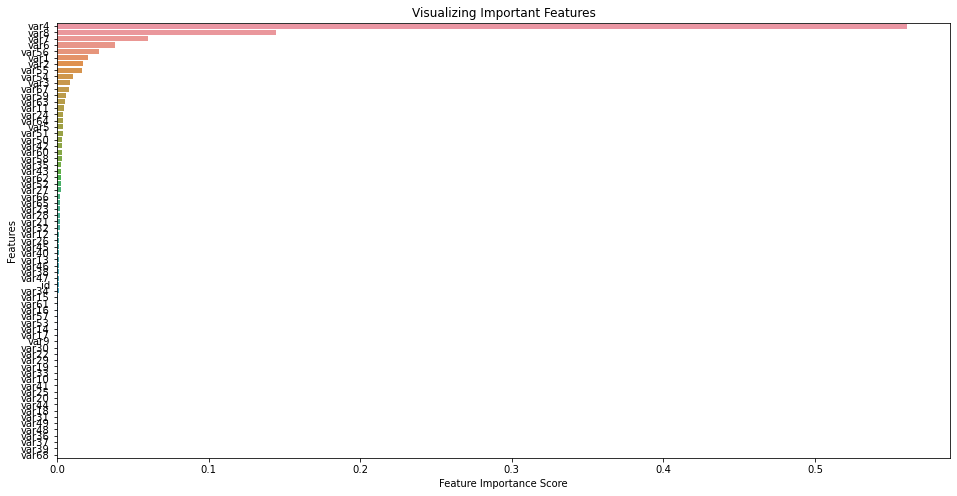

In [42]:
def visualiza_features_importantes(features_lista):
    %matplotlib inline

    plt.figure(figsize=(16,8))
    sns.barplot(x=features_lista, y=features_lista.index)

    plt.xlabel('Feature Importance Score')
    plt.ylabel('Features')
    plt.title("Visualizing Important Features")
    plt.show()
    
visualiza_features_importantes(feature_imp)

In [43]:
feature_selecionadas = []
for feature, importancia in feature_imp.iteritems():
  if importancia >0.01:
    print("{}:\t{}".format(feature, importancia))
    feature_selecionadas.append(feature)

var4:	0.5609444056719171
var8:	0.14420500821272442
var7:	0.059963749315229964
var6:	0.038274681284864616
var56:	0.027481145009676723
var1:	0.020293617772419406
var2:	0.01730394754558261
var55:	0.01618764162759101
var54:	0.010370279880110142


In [44]:
%%time
dataset3 = train[feature_selecionadas]
classes3 = train['y']

gbc_clf1 = GradientBoostingClassifier(random_state=48)
resul_gbc1 = cross_val_predict(gbc_clf1,dataset3, classes3, cv=100)

CPU times: user 7min 18s, sys: 422 ms, total: 7min 18s
Wall time: 7min 19s


In [45]:
%%time
score_gbc1 = cross_val_score(gbc_clf1,dataset3, classes3, cv=100)
score_gbc1.mean()

CPU times: user 7min, sys: 619 ms, total: 7min
Wall time: 7min 1s


0.8729937069223854

In [46]:
print(classification_report(classes3, resul_gbc1))
print('\n')
print(confusion_matrix(classes3, resul_gbc1))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92     11273
           1       0.74      0.58      0.65      2850

    accuracy                           0.87     14123
   macro avg       0.82      0.76      0.78     14123
weighted avg       0.87      0.87      0.87     14123



[[10686   587]
 [ 1207  1643]]


### Light

In [47]:
light = lgbm.LGBMClassifier()
light.fit(X_train,y_train)
feature_imp = pd.Series(light.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

var4     194
var55    151
var56    123
var67    103
var8      99
id        96
var64     93
var1      92
var58     90
var5      85
var62     85
var63     84
var61     83
var35     83
var68     77
var3      73
var12     72
var52     70
var59     67
var11     67
var34     64
var6      63
var2      61
var32     53
var13     52
var7      50
var43     49
var19     47
var54     44
var40     42
var15     38
var60     36
var37     35
var57     34
var26     34
var33     29
var24     29
var21     27
var42     25
var51     24
var50     24
var53     18
var65     17
var14     17
var36     16
var17     15
var10     15
var27     14
var29     14
var22     14
var66     13
var23     13
var16     12
var41     11
var28     11
var38     10
var25     10
var9       9
var46      7
var45      5
var30      4
var48      3
var49      2
var20      2
var47      1
var39      0
var18      0
var44      0
var31      0
dtype: int32

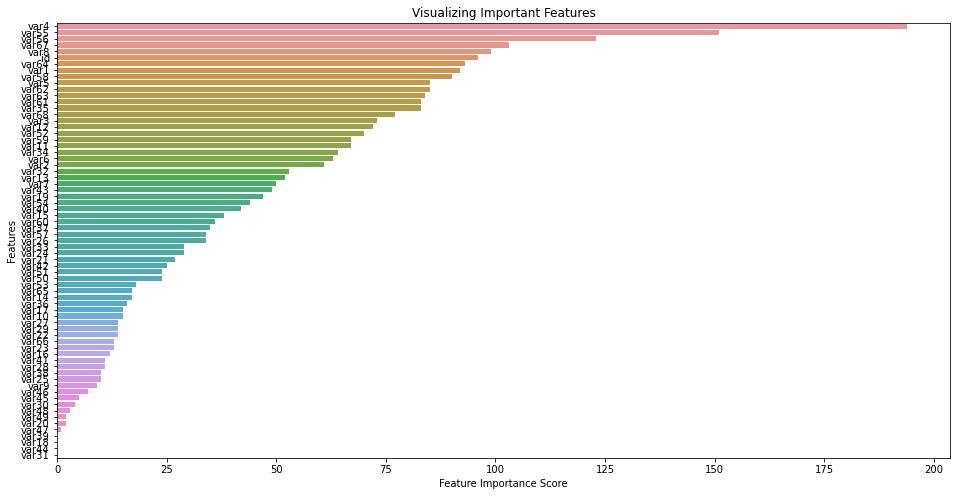

In [48]:
def visualiza_features_importantes(features_lista):
    %matplotlib inline

    plt.figure(figsize=(16,8))
    sns.barplot(x=features_lista, y=features_lista.index)

    plt.xlabel('Feature Importance Score')
    plt.ylabel('Features')
    plt.title("Visualizing Important Features")
    plt.show()

visualiza_features_importantes(feature_imp)

In [49]:
feature_selecionadas = []
for feature, importancia in feature_imp.iteritems():
  if importancia >50:
    print("{}:\t{}".format(feature, importancia))
    feature_selecionadas.append(feature)

var4:	194
var55:	151
var56:	123
var67:	103
var8:	99
id:	96
var64:	93
var1:	92
var58:	90
var5:	85
var62:	85
var63:	84
var61:	83
var35:	83
var68:	77
var3:	73
var12:	72
var52:	70
var59:	67
var11:	67
var34:	64
var6:	63
var2:	61
var32:	53
var13:	52


In [50]:
dataset4 = train[feature_selecionadas]
classes4 = train['y']

In [51]:
%%time
light1 = lgbm.LGBMClassifier(random_state=48)
resul_light1 = cross_val_predict(light1,dataset4, classes4, cv=100)

CPU times: user 3min 19s, sys: 1.7 s, total: 3min 20s
Wall time: 56.1 s


In [52]:
%%time
score_light = cross_val_score(light1,dataset4, classes4, cv=100)
score_light.mean()

CPU times: user 3min 19s, sys: 1.75 s, total: 3min 21s
Wall time: 55.8 s


0.8643467186095295

In [53]:
print(classification_report(classes3, resul_light1))
print('\n')
print(confusion_matrix(classes3, resul_light1))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92     11273
           1       0.72      0.53      0.61      2850

    accuracy                           0.86     14123
   macro avg       0.81      0.74      0.77     14123
weighted avg       0.86      0.86      0.86     14123



[[10688   585]
 [ 1331  1519]]


### Tunando os modelos que foram feitos validação cruzada - Light, Boosting, Floresta Aleatória

In [112]:
from sklearn.model_selection import GridSearchCV

In [113]:
#Lista de possíveis valores de estimators
valores_estimators = [10, 20, 30, 40]

#Lista de possíveis valores para o critério de divisão
valores_criterion = ['gini','entropy']

#Lista de possíveis valores para a profundidade máxima
valores_max_depth = [10, 20, 30, 40]

#Lista de possíveis valores para os parametros min_samples_split e min_samples_leaf.
valores_min_samples_split = [2, 5, 10, 15]
valores_min_samples_leaf = [1, 5, 10, 15]

#Define um dicionário que recebe as listas de parâmetros e valores.
parametros_grid = dict(n_estimators=valores_estimators,
                       criterion=valores_criterion,
                       max_depth=valores_max_depth,
                       min_samples_split=valores_min_samples_split,
                       min_samples_leaf=valores_min_samples_leaf 
                      )
parametros_grid

{'n_estimators': [10, 20, 30, 40, 50],
 'criterion': ['gini', 'entropy'],
 'max_depth': [10, 20, 30, 40, 50],
 'min_samples_split': [2, 5, 10, 15],
 'min_samples_leaf': [1, 5, 10, 15]}

In [114]:
%%time

rf = RandomForestClassifier()

grid_rf = GridSearchCV(rf, parametros_grid, cv=10, scoring='accuracy')

grid_rf.fit(dataset, classes)

KeyboardInterrupt: 

In [ ]:
grid_rf.cv_results_

In [134]:
df1 = pd.read_csv('test.csv', sep=',')
df1

,id,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var59,var60,var61,var62,var63,var64,var65,var66,var67,var68
0,0,5,126,1353,28956,743,1289,27,-999,1,...,0.201839,0.353965,0.166641,0.049108,0.986882,0.016683,-999.0,-999.0,0.176471,0.253676
1,2,6,126,1446,7803,5151,935,35,-999,3,...,0.072127,0.074555,0.217009,0.144403,0.892028,0.038323,-999.0,-999.0,0.147059,0.099265
2,4,5,44,243,4325,1109,1903,33,24,1,...,0.324770,0.384992,0.330680,0.072864,0.930373,0.021052,-999.0,-999.0,0.294118,0.136029
3,7,4,53,419,743,7750,183,35,-999,3,...,0.131070,-999.000000,0.244936,0.158088,0.986882,0.022649,-999.0,-999.0,0.294118,0.220588
4,15,4,126,1863,22693,5625,965,9,-999,3,...,0.225166,0.059940,0.252794,0.080405,0.944501,0.021806,-999.0,-999.0,0.352941,0.113971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21178,35297,4,126,1460,13335,9048,620,35,27,3,...,0.148933,-999.000000,0.326307,0.132833,0.968718,0.039626,-999.0,-999.0,0.323529,0.253676
21179,35298,18,19,532,14837,2590,855,27,20,3,...,0.179243,0.205030,0.229354,0.052108,0.940464,0.016952,-999.0,-999.0,0.088235,0.209559
21180,35300,4,126,2923,16685,3162,1604,35,-999,3,...,0.237607,0.810448,0.179781,0.029155,0.745711,0.020158,-999.0,-999.0,0.205882,0.161765
21181,35302,5,-999,-999,367,7637,1389,35,-999,3,...,0.102662,-999.000000,0.149598,0.032583,0.891019,0.012596,-999.0,-999.0,-999.000000,0.246324


### SUBMISSÃO ARQUIVO

In [ ]:
gbc_clf = GradientBoostingClassifier(random_state=48)
resul_gbc = cross_val_predict(gbc_clf,dataset, classes, cv=100)
score_gbc = cross_val_score(gbc_clf,dataset, classes, cv=100)
score_gbc.mean()


In [106]:
del test['id']
test

,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,var13,var14,var15,var16,var17,var18,var19,var20,var21,var22,var23,var24,var25,var26,var27,var28,var29,var30,var31,var32,var33,var34,var35,var36,var37,var38,var39,var40,var41,var42,var43,var44,var45,var46,var47,var48,var49,var50,var51,var52,var53,var54,var55,var56,var57,var58,var59,var60,var61,var62,var63,var64,var65,var66,var67,var68
0,5,126,1353,28956,743,1289,27,0,1,33,4530,914,991,19,1,3,3,3,1155,19,1031,5,3,2,3,7,0,25,4,1,0,11,2,62,413,27,0,0,4,6,3,24,3,1,0,0,0,0,0,0,0,44,1,1,0.217528,0.272,0.367742,0.062900,0.201839,0.353965,0.166641,0.049108,0.986882,0.016683,-999.0,-999.0,0.176471,0.253676
1,6,126,1446,7803,5151,935,35,0,3,63,8731,1341,2033,26,58,58,22,5,1299,26,773,5,3,1,2,1,0,25,4,0,1,6,5,58,692,21,15,8,4,0,1,30,0,1,0,0,0,0,0,0,0,13,1,1,0.221968,0.853,0.053763,0.177047,0.072127,0.074555,0.217009,0.144403,0.892028,0.038323,-999.0,-999.0,0.147059,0.099265
2,5,44,243,4325,1109,1903,33,24,1,63,10131,914,1503,24,60,61,23,5,1294,24,1562,5,4,1,0,1,0,26,5,2,0,17,0,12,553,0,18,0,4,10,3,26,14,1,0,0,0,0,0,0,0,36,1,1,0.213224,0.632,0.101075,0.210879,0.324770,0.384992,0.330680,0.072864,0.930373,0.021052,-999.0,-999.0,0.294118,0.136029
3,4,53,419,743,7750,183,35,0,3,14,636,5879,146,26,22,22,10,4,811,26,152,5,3,2,4,4,0,24,4,2,0,12,5,38,662,28,1,0,4,9,3,28,7,1,0,0,0,0,0,1,0,13,1,1,0.205044,0.117,0.935484,0.007068,0.131070,-999.000000,0.244936,0.158088,0.986882,0.022649,-999.0,-999.0,0.294118,0.220588
4,4,126,1863,22693,5625,965,9,0,3,63,24967,4427,772,5,73,73,29,5,595,5,796,0,1,0,1,7,0,11,2,1,0,21,3,18,546,0,1,0,4,6,3,28,8,1,0,0,0,0,1,0,0,51,1,1,0.203750,0.079,0.967742,0.024989,0.225166,0.059940,0.252794,0.080405,0.944501,0.021806,-999.0,-999.0,0.352941,0.113971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21178,4,126,1460,13335,9048,620,35,27,3,63,13567,2617,572,26,37,35,11,4,1573,26,592,5,3,2,1,1,0,24,4,1,0,21,6,42,332,21,20,9,1,11,3,25,13,1,0,0,0,0,0,0,0,34,2,2,0.213106,0.065,0.967742,0.387701,0.148933,-999.000000,0.326307,0.132833,0.968718,0.039626,-999.0,-999.0,0.323529,0.253676
21179,18,19,532,14837,2590,855,27,20,3,63,15367,2261,678,19,0,0,0,0,1383,19,700,0,3,2,1,0,0,25,4,1,0,20,0,60,578,2,0,0,4,2,3,26,6,1,0,0,0,0,0,0,0,10,2,2,0.210435,0.740,0.101075,-999.000000,0.179243,0.205030,0.229354,0.052108,0.940464,0.016952,-999.0,-999.0,0.088235,0.209559
21180,4,126,2923,16685,3162,1604,35,0,3,63,17658,4369,1279,26,0,0,0,0,971,26,1334,5,3,0,1,0,0,24,4,1,0,12,5,49,74,28,2,0,4,4,3,19,4,1,0,0,0,0,0,0,0,39,2,2,0.218353,0.288,0.367742,-999.000000,0.237607,0.810448,0.179781,0.029155,0.745711,0.020158,-999.0,-999.0,0.205882,0.161765
21181,5,0,0,367,7637,1389,35,0,3,63,28370,679,1117,26,34,34,10,4,868,26,1158,5,3,2,1,9,0,24,4,1,0,15,5,54,434,0,1,0,4,19,3,23,6,1,0,0,0,0,0,0,0,3,2,2,0.224865,0.324,0.246237,0.199008,0.102662,-999.000000,0.149598,0.032583,0.891019,0.012596,-999.0,-999.0,0.000000,0.246324


In [113]:
sub = random_clf.predict(test)
submission = pd.DataFrame()
submission['id'] = df8['id']
submission['predicted'] = sub

submission.to_csv('submission_clf.csv', index=False)

In [111]:
sub

array([1, 1, 0, ..., 1, 1, 1])

In [93]:
df8['predicted'] = random_clf.predict(test)
df8.to_csv('submission_boosting.csv', index=False)
df8.tail(10)

ValueError: Number of features of the model must match the input. Model n_features is 68 and input n_features is 69 